**ML ASSIGNMENT2 - Vaibhav Khare**

Vaibhav Khare - 2025ab05182@wilp.bits-pilani.ac.in

# **Naive Bayes Classifier on Portuguese banking institution**

***About Datset***

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
#Import Libraries
import os;
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Export Train, Test dataset
bank_train = pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-full.csv', sep=',')
bank_test = pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-test.csv', sep=',')


In [3]:
#Prepare Data for Gaussian Naive Bayes

X_train = bank_train.drop('y', axis=1)
y_train = bank_train['y']
X_test = bank_test.drop('y', axis=1)
y_test = bank_test['y']

print("Features and target variables separated.")

Features and target variables separated.


In [4]:
# Identify categorical and numerical columns in X_train and X_test crucial for subsequent preprocessing steps like encoding and scaling.

categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [5]:
# Apply one-hot encoding to the identified categorical features in both

X_train_categorical = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_categorical = pd.get_dummies(X_test[categorical_cols], drop_first=True)

# Align columns - crucial for consistent feature sets between train and test
X_train_categorical, X_test_categorical = X_train_categorical.align(X_test_categorical, join='outer', axis=1, fill_value=0)

print("Categorical features one-hot encoded and aligned.")

Categorical features one-hot encoded and aligned.


In [6]:
# Initialize a StandardScaler, fit it exclusively on the numerical features of X_train
from sklearn.preprocessing import StandardScaler

# Use fitted scaler to transform the numerical features of both X_train and X_test
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])

# Convert scaled arrays back to DataFrames
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols, index=X_train.index)
X_test_scaled_numerical = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols, index=X_test.index)

print("Numerical features scaled for X_train and X_test.")

Numerical features scaled for X_train and X_test.


In [7]:
# Convert the target variables y_train and y_test from categorical ('yes', 'no') into a numerical format (1, 0)
y_train = y_train.map({'no': 0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})

print("Target variables y_train and y_test converted to numerical format.")

Target variables y_train and y_test converted to numerical format.


In [8]:
# Combine the scaled numerical features and one-hot encoded categorical features for both the training and test sets into single DataFrames

X_train_processed = pd.concat([X_train_scaled_numerical, X_train_categorical], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical, X_test_categorical], axis=1)

print("Processed training and test feature sets created.")

Processed training and test feature sets created.


In [9]:
# Import the GaussianNB classifier
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the model using the preprocessed training data (X_train_processed and y_train)
gnb_classifier.fit(X_train_processed, y_train)

print("Gaussian Naive Bayes classifier initialized and trained.")

Gaussian Naive Bayes classifier initialized and trained.


In [10]:
# Make predictions on the test set using the Gaussian Naive Bayes Classifier
y_pred = gnb_classifier.predict(X_test_processed)

# Get prediction probabilities for AUC score using the Gaussian Naive Bayes Classifier
y_pred_proba = gnb_classifier.predict_proba(X_test_processed)[:, 1]

print("Predictions and probabilities generated successfully using gnb_classifier.")

Predictions and probabilities generated successfully using gnb_classifier.


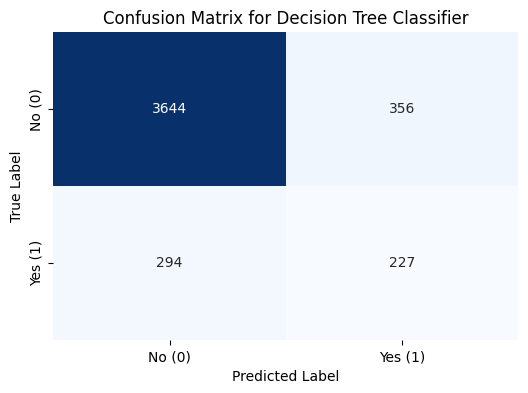

In [11]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test data
y_pred = gnb_classifier.predict(X_test_processed)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8562
Precision: 0.3894
Recall: 0.4357
F1-Score: 0.4112

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4000
           1       0.39      0.44      0.41       521

    accuracy                           0.86      4521
   macro avg       0.66      0.67      0.66      4521
weighted avg       0.86      0.86      0.86      4521

